In [2]:
from functools import partial
from pathlib import Path

from matplotlib.pyplot import plot  # type: ignore
from torch import manual_seed  # type: ignore

from karpathy_series.makemore.bigrams import TriGram
from karpathy_series.makemore.data import read_data
from karpathy_series.makemore.encoding.character import BiCharacterEncoder, CharacterEncoder, CharacterSet
from karpathy_series.makemore.models.generation import TriGramNetGenerator
from karpathy_series.makemore.models.linear import Linear
from karpathy_series.makemore.training.data import TrainingSequencer, TrainingSequence
from karpathy_series.makemore.training.learning import Learner

%matplotlib inline
seed_gen = manual_seed(2147483647)  # type: ignore

In [2]:
data_path = Path("../../data/names.txt")
words = read_data(data_path)
char_set = CharacterSet.from_words(words)
char_encoder = CharacterEncoder.from_charset(char_set)
bi_char_encoder = BiCharacterEncoder.from_charset(char_set)
tri_gram_gen = partial(TriGram.generate, ".")
ts_tri = TrainingSequencer(bi_char_encoder, char_encoder, tri_gram_gen)

In [3]:
training_sequence: TrainingSequence = ts_tri.training_sequence(words, 100, True)

In [4]:
one_layer = Linear.init_random_from_size(bi_char_encoder.size, char_encoder.size)
generator = TriGramNetGenerator(char_set, bi_char_encoder, char_encoder, one_layer)

In [5]:
learner = Learner(one_layer, 30)
losses = learner(training_sequence, epochs=100, report_epochs=10)

Epoch 10 is finished with loss = 2.212057113647461
Epoch 20 is finished with loss = 2.2995846271514893
Epoch 30 is finished with loss = 2.2289185523986816
Epoch 40 is finished with loss = 2.142369508743286
Epoch 50 is finished with loss = 2.175339937210083
Epoch 60 is finished with loss = 2.21106219291687
Epoch 70 is finished with loss = 2.2340173721313477
Epoch 80 is finished with loss = 2.0353269577026367
Epoch 90 is finished with loss = 2.165724754333496
Epoch 100 is finished with loss = 2.2036876678466797


In [11]:
generated = generator()
generated

'amega'

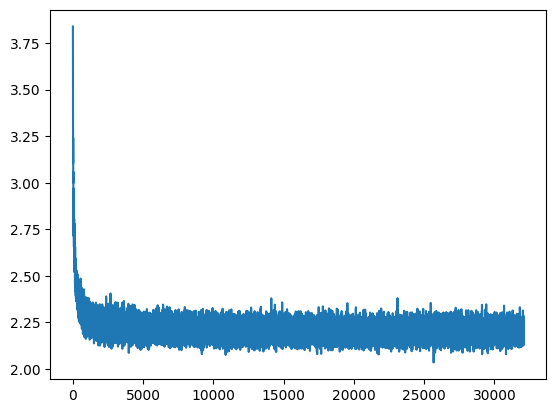

In [12]:
plot(losses)